A1.6_588359

DIEGO MARCELO GONZALEZ LUJAN IMT 588359

1. El codigo use la libreria pandas para manipular datos y matplotlib.pyplot para graficar. Luego usando la libreria de pandas cargue el archivo csv con el codigo pd.read_csv(). Tube que eliminar filas con valores nulos en la seccion de Tiempo y Calificacion usando dropna() asegurando que el analiusis no tenga datos incompletos. Esto me ayuda en no tener errores en el modelo. Para ver la relacion del tiempo de entrega y la calificacion genere una grafica de dispersion con plt.scatter().

Dimensiones del dataframe:  (443, 2)

Tipos de datos de cada variable:
Tiempo          float64
Calificacion     object
dtype: object

VALORES NULOS POR COLUMNAS: 
Tiempo          11
Calificacion    13
dtype: int64


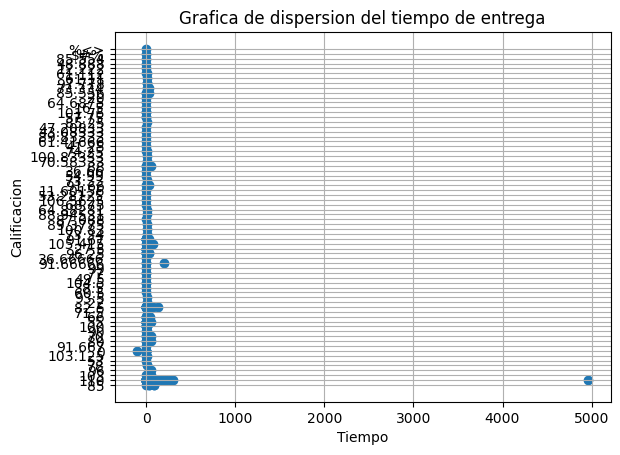

In [31]:
#importar la libreria en pandas( pandas ayuda en facilitar el analisis y la manipulacion de datos de tablas y de estructuras) 
import pandas as pd 
import matplotlib.pyplot as plt

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('A1.6 Tiempo de Entrega.csv')

print("Dimensiones del dataframe: ", df.shape)

print("\nTipos de datos de cada variable:")
print(df.dtypes)

print("\nVALORES NULOS POR COLUMNAS: ")
print(df.isnull().sum())


#ELIMINAR LAS FILAS CON VALORES NULOS EN TIEMPO O CALIFICACION
df = df.dropna(subset=['Tiempo','Calificacion'])

#Graficar
%matplotlib inline
plt.scatter(df.Tiempo,df.Calificacion)
plt.title('Grafica de dispersion del tiempo de entrega')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.grid(True)
plt.show()
            



2. En este codigo separe las variables independientes como X: tiempo y dependientes como Y: calificacion para el modelo de analisis. Los datos se dividen en entrenamiento y prueba usando train_test_split() con un 30% para prueba y un estado aleatorio fijo para tener reproducibilidad en otras ejecuciones.

Si los promedios de 'Tiempo' y 'Calificacion' en los conjuntos de entrenamiento y prueba son similares, esto significa que la muestra es representativa y que el modelo puede generalizar bien. Si hay una gran diferencia, podria indicar un sesgo en la division de los datos, lo que afectaria negativamente la capacidad del modelo para predecir con precision en datos no vistos.

In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('A1.6 Tiempo de Entrega.csv')

#ELIMINAR LAS FILAS CON VALORES NULOS EN TIEMPO O CALIFICACION
df = df.dropna(subset=['Tiempo','Calificacion'])

# Asegurar que 'Calificacion' sea numerico
df['Calificacion'] = pd.to_numeric(df['Calificacion'], errors='coerce')
df = df.dropna(subset=['Calificacion'])


# Separar las variables independientes y dependientes
X = df[['Tiempo']]
Y = df['Calificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=21)

# Calcular promedios
promedio_tiempo_entrenamiento = train_X['Tiempo'].mean()
promedio_tiempo_prueba = test_X['Tiempo'].mean()
promedio_calificacion_entrenamiento = train_Y.mean()
promedio_calificacion_prueba = test_Y.mean()

print("Promedio de 'Tiempo' en entrenamiento:", promedio_tiempo_entrenamiento)
print("Promedio de 'Tiempo' en prueba:", promedio_tiempo_prueba)
print("Promedio de 'Calificacion' en entrenamiento:", promedio_calificacion_entrenamiento)
print("Promedio de 'Calificacion' en prueba:", promedio_calificacion_prueba)


Promedio de 'Tiempo' en entrenamiento: 33.23932478613378
Promedio de 'Tiempo' en prueba: 19.6041257538062
Promedio de 'Calificacion' en entrenamiento: 94.26008491638797
Promedio de 'Calificacion' en prueba: 95.99103093023255


3. En este codigo ajuste un modelo de regresion polinomial para capturar relaciones no lineales en los datos. El codiugo que use fue PolynomialFeatrues() y se entrena un modelo de regresion lineal sobre los datos polinomiales. Para que pueda evaluar el modelo calcule el Error Cuadratido Medio MSE con mean_squared_error() y el Coeficiente de Determinacion R^2 lo que me ayuda a saber que tan bien se ajusta el modelo a los datos. Tambien se imprime los coeficientes del modelo lo que permite analizar el impacto en la prediccion. Al final genere una grafica de dsipersion con los datos reales y la curva de regresion polinomial lo que muestra la relacion entre el tiempo de entrega y la calificacion. 

Error cuadrático medio (MSE): 547.6418849489661
Coeficiente de determinación R^2: 0.0221829868045339

Coeficientes del modelo:
termino lineal: 0.17382835153062393
termino cuadratico: -3.4292615289865935e-05
intercepto: 91.34567117349998


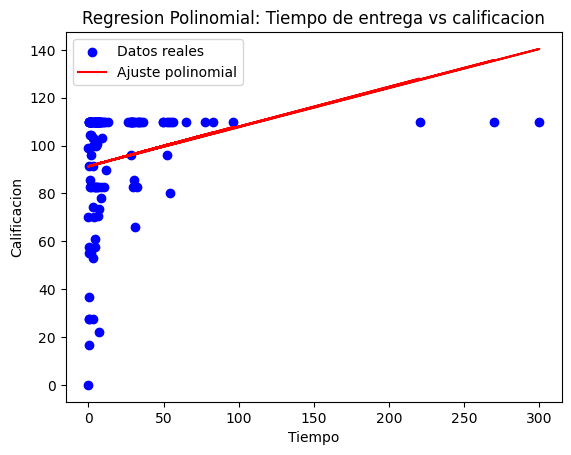


Resumen del modelo de regresión:
                            OLS Regression Results                            
Dep. Variable:           Calificacion   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     7.360
Date:                Wed, 12 Feb 2025   Prob (F-statistic):           0.000760
Time:                        20:59:52   Log-Likelihood:                -1370.5
No. Observations:                 299   AIC:                             2747.
Df Residuals:                     296   BIC:                             2758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             91.3

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


# Separar las variables independientes y dependientes
X = df[['Tiempo']]
Y = df['Calificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=21)

#ajustar el modelo de regresion poliniomial 
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(train_X)

#crear el modelo de regresion

model= LinearRegression()
model.fit(X_poly_train, train_Y)

#predicciones para el conjunto de pruebas
X_poly_test = poly.transform(test_X)
pred_Y = model.predict(X_poly_test)

#evaluar el modelo 
mse = mean_squared_error(test_Y, pred_Y)
r2 = r2_score(test_Y, pred_Y)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación R^2: {r2}")

#resumen de los ceoficientes 
print("\nCoeficientes del modelo:")
print(f"termino lineal: {model.coef_[1]}")
print(f"termino cuadratico: {model.coef_[2]}")
print(f"intercepto: {model.intercept_}")

#grafica

plt.scatter(test_X, test_Y, color='blue', label='Datos reales')
plt.plot(test_X, pred_Y, color='red', label='Ajuste polinomial')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Regresion Polinomial: Tiempo de entrega vs calificacion')
plt.legend()
plt.show() 

# convertir los datos de entrada y salida a un DataFrame para statsmodels
X_poly_train_sm = sm.add_constant(X_poly_train) 

# convertir train_Y a DataFrame para garantizar que los índices coincidan
train_Y = pd.DataFrame(train_Y)

# asegurarnos de que el índice coincida
X_poly_train_sm = pd.DataFrame(X_poly_train_sm)
X_poly_train_sm.index = train_Y.index 

# ajustar el modelo con statsmodels para obtener p-value, t-value y std.error
sm_model = sm.OLS(train_Y, X_poly_train_sm)  # OLS: Ordinary Least Squares (Regresión lineal)
sm_results = sm_model.fit()  # Ajuste del modelo


print("\nResumen del modelo de regresión:")
print(sm_results.summary())


4. En este codigo genere prediciones con el codigo yhat_ml sobre los datos de prueba de test_x usando el modelo entrenado. Estas predicciones representan las calificaciones estimadas en funcion del tiempo de entrega, basado en la tendencia de los datos de entrenamiento. Luego calcule el Residual Sum of Squares RSS que es la suma de los cuadrados de los errores entre los valores reales de test_Y y las predicciones de yHat_ml. Este valor mide que tanto se desvian las predicciones del modelo con respecto a los datos rteales. Ya por ultimo obtuve el Root Squared Error RSE dividneo el RSS entre el numero de observaciones menos 1 y finalizarlo con una raiz cuadrada. El RSE indica el error promedio del modelo en las predicciones dando una idea de que tan preciso es el ajuste de la regresion lineal. 

In [57]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#cargar el archivo csv a un dataframe el pd.read es una biblioteca de Pandas que se utiliza para leer datos de diferentes archivos y luego los convierte en data frames de pandas. 
df = pd.read_csv('A1.6 Tiempo de Entrega.csv')

#ELIMINAR LAS FILAS CON VALORES NULOS EN TIEMPO O CALIFICACION
df = df.dropna(subset=['Tiempo','Calificacion'])

# Asegurar que 'Calificacion' sea numerico

df['Calificacion'] = pd.to_numeric(df['Calificacion'], errors='coerce')
df = df.dropna(subset=['Calificacion'])


# Separar las variables independientes y dependientes
X = df[['Tiempo']]
Y = df['Calificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=21)

# Calcular promedios
promedio_tiempo_entrenamiento = train_X['Tiempo'].mean()
promedio_tiempo_prueba = test_X['Tiempo'].mean()
promedio_calificacion_entrenamiento = train_Y.mean()
promedio_calificacion_prueba = test_Y.mean()


# Ajustar el modelo de regresión lineal
model1 = LinearRegression()
model1.fit(train_X, train_Y)

# Calcular las predicciones del modelo en los datos de prueba
yHat_ml = model1.predict(test_X)

# Calcular el RSS (Residual Sum of Squares)
RSS_ml = np.sum((test_Y - yHat_ml) ** 2)

# Calcular el RSE (Root Squared Error)
RSE_ml = np.sqrt(RSS_ml / (len(test_Y) - 1))

print("RSE (Root Squared Error):", RSE_ml)

RSE (Root Squared Error): 23.787260634560663


5. En este codigo use el modelo KNN con k = 3 para predeicr la calificacion de funcion del tiempo de entrega. Dividi los datos en entrenamiento y prueba otra ves para luego ajustar un modelo con los datos de entrenamiento. Genere predicciones en los datos de prueba en pred_Y_knn y evalue el modelo usando el Root Squared Error. Al final cree una grafica de dispersion donde los puntos azules representan las calificaciones y la linea roja muestra las predicciones del modelo KNN. 

RSE del modelo KNN: 23.28883823219278


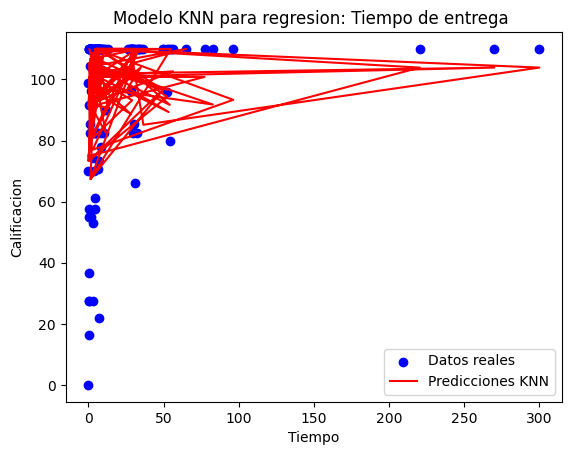

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Separar las variables independientes y dependientes
X = df[['Tiempo']]
Y = df['Calificacion']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=21)

#Entrenar el modelo KNN 
k_value = 3 
knn_modelo = KNeighborsRegressor(n_neighbors=k_value,metric='euclidean')
knn_modelo.fit(train_X, train_Y)

#realizar predicciones con el modelo entrenado
pred_Y_knn = knn_modelo.predict(test_X) 

#evalua el modelo usando la metrica RSE
rse_knn = np.sqrt(mean_squared_error(test_Y, pred_Y_knn))
print(f"RSE del modelo KNN: {rse_knn}")

#grafica
plt.scatter(test_X, test_Y, color='blue', label='Datos reales')
plt.plot(test_X, pred_Y_knn, color='red', label='Predicciones KNN')
plt.xlabel('Tiempo')
plt.ylabel('Calificacion')
plt.title('Modelo KNN para regresion: Tiempo de entrega ')
plt.legend()
plt.show() 

6. En este codigo entrene y evalue tres modelos de regresion, lineal, polinomial y KNN para predecir la calificacion basada en el tiempo de entrega. Cada modelo se entrena con datos de entrenamiento y luego se generan predicciones en los datos de prueba. Se caclula el RSE para cada modelo lo que permite comparar su precision. Al final se imprimen los valores de RSE de los tres modelos y resulta que el "ganador" de los resultados es el RSE para el modelo Polinomial.

In [61]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


#Entrenar el modelo KNN 
k_value = 3 
knn_modelo = KNeighborsRegressor(n_neighbors=k_value,metric='euclidean')
knn_modelo.fit(train_X, train_Y)

#definir el modelo lineal y entrenarlo

modelo_lineal= LinearRegression()
modelo_lineal.fit(train_X, train_Y)

# Definir el modelo Polinomial y entrenarlo
degree = 3 
poly_modelo = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_modelo.fit(train_X, train_Y)

# Predicciones
yHat_knn = knn_modelo.predict(test_X)
yHat_linear = modelo_lineal.predict(test_X)
yHat_poly = poly_modelo.predict(test_X)

# Calcular el RSE para cada modelo
RSE_knn = np.sqrt(mean_squared_error(test_Y, yHat_knn))
RSE_linear = np.sqrt(mean_squared_error(test_Y, yHat_linear))
RSE_poly = np.sqrt(mean_squared_error(test_Y, yHat_poly))

print(f"RSE para el modelo Lineal: {RSE_linear}")
print(f"RSE para el modelo KNN: {RSE_knn}")
print(f"RSE para el modelo Polinomial: {RSE_poly}")


RSE para el modelo Lineal: 23.69488257437881
RSE para el modelo KNN: 23.28883823219278
RSE para el modelo Polinomial: 24.801490995380323


7. Por ultimo en este codigo genere una grafica comparativa que muestra los datos reales juntos con las predicciones de los tres modelos lineal es azul, knn es rojo y polinomial es verde. Cada modelo usa un marco diferente para diferenciar los puntos.

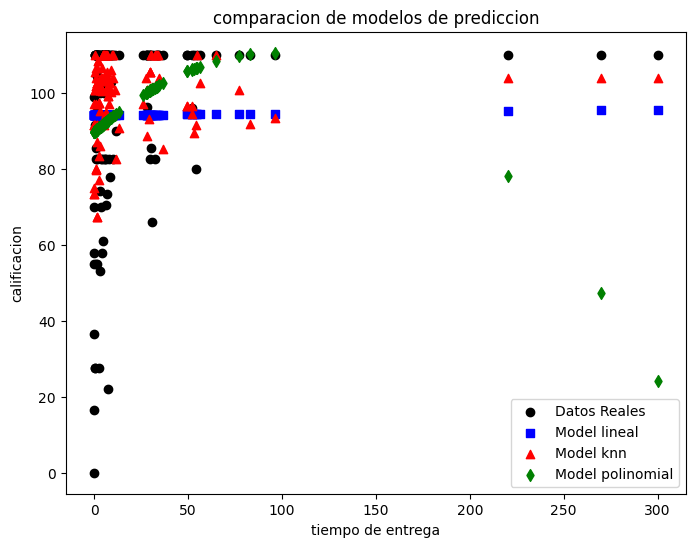

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(test_X, test_Y, color = 'black', marker = 'o', label = 'Datos Reales')

plt.scatter(test_X, yHat_linear, color='blue', marker='s', label = 'Model lineal')
plt.scatter(test_X, yHat_knn, color='red', marker='^', label = 'Model knn')
plt.scatter(test_X, yHat_poly, color='green', marker='d', label = 'Model polinomial')

plt.xlabel("tiempo de entrega")
plt.ylabel("calificacion")
plt.title("comparacion de modelos de prediccion")

plt.legend()
plt.show()
